Code is for an Airbus A321 at sea level, 10.000 feet and 35.000 feet --means FL350, flight level 350
Thrust required = drag at the steady level
Thrust (fl350) = thrust(at sea level) * (density (fl350) / density(sea level))
CL = (2*weight)/(density*velocity^2*S)  where S is the area of the wing

Reference Book: Python for Mechanical & Aerospace Engineering (*2021, Alex Kenan*)


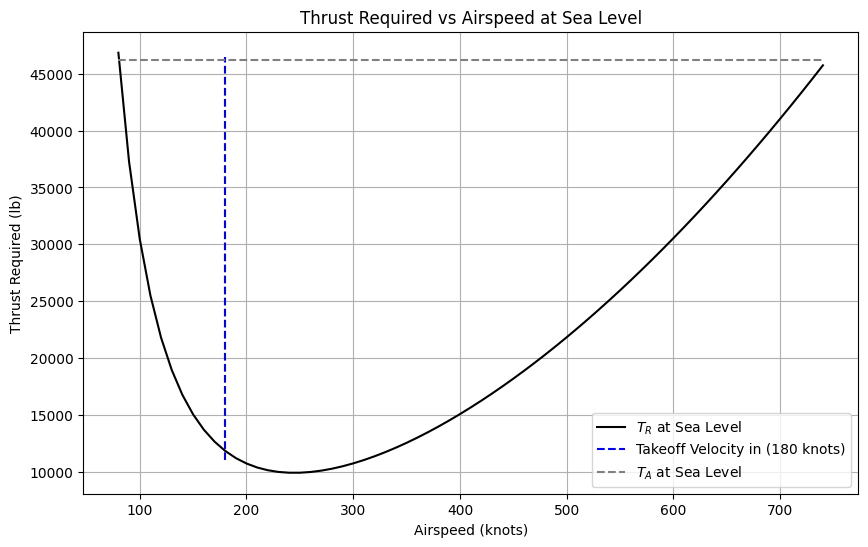

In [1]:
from numpy import pi
import matplotlib.pyplot as plt

# Constants
w = 200000  # weight in pounds
s = 1318    # wing area, ft^2
wing_span = 117.416666667  # ft
cd0 = 0.0185
thrust = 66000  # lb thrust total
AR = (wing_span**2) / s  # aspect ratio
e = 0.92
k = 1 / (pi * e * AR)
rho_sl = 23.77e-4  # slugs/ft^3

# Function to convert knots to ft/sec
def knots_to_ftpersec(speed):
    return speed * 1.68781

# Function to calculate thrust required
def thrust_required(rho_inf, v_inf, s, cd0, k, w):
    cl = (2 * w) / (rho_inf * v_inf**2 * s)
    return 0.5 * rho_inf * v_inf**2 * s * (cd0 + k * cl**2)

# Generate airspeed values
x_vals_sl = range(80, 750, 10)

# Calculate thrust required at each airspeed
tr_sl = [thrust_required(rho_sl, knots_to_ftpersec(x), s, cd0, k, w) for x in x_vals_sl]

#Assume 70% throttle setting
TA_sl = 0.7*thrust  #thrust available
y_coord_sl = [TA_sl for _ in x_vals_sl]

#Take-off velocity
take_off_sl = [180,180]

#Cruise velocity
cruise_velocity = [11000, 46500]

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(x_vals_sl, tr_sl, color='black', label=r"$T_R$ at Sea Level")
plt.plot(take_off_sl, cruise_velocity, color='blue',linestyle='--', label="Takeoff Velocity in ({} knots)".format(take_off_sl[0]))
plt.plot(x_vals_sl, y_coord_sl, color='grey', linestyle ='--', label=r"$T_A$ at Sea Level")
plt.title("Thrust Required vs Airspeed at Sea Level")
plt.xlabel("Airspeed (knots)")
plt.ylabel("Thrust Required (lb)")
plt.legend()
plt.grid()
plt.show()